In [13]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv('data/chess-openings.csv')
counts = {k:v for k,v in dict(df['opening'].value_counts()).items()}
mean_count = np.array(list([c for c in counts.values() if c > 1])).mean()

In [15]:
df = pd.read_csv('data/chess-openings.csv')

elo_bins = [0, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 3000]
elo_labels = ['<1200', '1200-1399', '1400-1599', '1600-1799', '1800-1999', '2000-2199', '2200-2399', '2400+']
## probably the same
df['white_group'] = pd.cut(df['white_rating'], bins=elo_bins, labels=elo_labels)
df['black_group'] = pd.cut(df['black_rating'], bins=elo_bins, labels=elo_labels)


In [16]:
total_counts = {k:v for k,v in dict(df['opening'].value_counts()).items()}
total_counts = dict(sorted(total_counts.items(), key=lambda item: item[1], reverse=True))
top10 = {k: v for i, (k, v) in enumerate(total_counts.items()) if i < 10}
top10

{'Bishops-Opening': 1206,
 'Scandinavian-Defense': 1018,
 'Queens-Pawn-Opening-Accelerated-London-System': 966,
 'Vant-Kruijs-Opening': 927,
 'Sicilian-Defense-Bowdler-Attack': 849,
 'Queens-Pawn-Opening-1...d5-2.e3': 782,
 'Kings-Pawn-Opening-Owens-Defense': 709,
 'Scandinavian-Defense-Mieses-Kotrc-Variation': 690,
 'Vant-Kruijs-Opening-1...e5': 668,
 'Philidor-Defense-3.Bc4': 661}

In [17]:
white = df.groupby('white_group')['opening'].apply(lambda x: x.mode()[0])
black = df.groupby('black_group')['opening'].apply(lambda x: x.mode()[0])

In [18]:
dict(white)
white

white_group
<1200                                     Scandinavian-Defense
1200-1399                                      Bishops-Opening
1400-1599                      Sicilian-Defense-Bowdler-Attack
1600-1799          Scandinavian-Defense-Mieses-Kotrc-Variation
1800-1999              Queens-Pawn-Opening-Zukertort-Variation
2000-2199    Sicilian-Defense-Hyperaccelerated-Dragon-Fianc...
2200-2399              Caro-Kann-Defense-Advance-Tal-Variation
2400+                       Alekhines-Defense-Modern-Main-Line
Name: opening, dtype: object

In [19]:
dict(black)
black

black_group
<1200                           Scandinavian-Defense
1200-1399                            Bishops-Opening
1400-1599            Sicilian-Defense-Bowdler-Attack
1600-1799                            Bishops-Opening
1800-1999                   Kings-Fianchetto-Opening
2000-2199                                Indian-Game
2200-2399    Caro-Kann-Defense-Advance-Tal-Variation
2400+        Queens-Pawn-Opening-Zukertort-Variation
Name: opening, dtype: object

In [84]:
total = df.groupby('opening').size().sort_values(ascending = False)
mean = total.mean()
total = total[total > mean]

white = df[df['white_result'] == 'win'].groupby('opening').size()
black = df[df['black_result'] == 'win'].groupby('opening').size()

white_rates = (white / total).dropna().sort_values(ascending = False)
black_rates = (black / total).dropna().sort_values(ascending = False)

In [85]:
total

opening
Bishops-Opening                                        1206
Scandinavian-Defense                                   1018
Queens-Pawn-Opening-Accelerated-London-System           966
Vant-Kruijs-Opening                                     927
Sicilian-Defense-Bowdler-Attack                         849
                                                       ... 
Sicilian-Defense-Delayed-Alapin-Variation-3...Nf6        22
Scotch-Game-Classical-Variation-5.Be3-Qf6-6.c3-Nge7      22
Center-Game-Accepted-Paulsen-Berger-Variation            22
Polish-Opening-Czech-Defense                             22
Sicilian-Defense-Tartakower-Variation                    22
Length: 533, dtype: int64

In [86]:
white_rates

opening
Kings-Pawn-Opening                                                   0.876866
Petrovs-Defense-Classical-Damiano-Variation-4.Qe2                    0.742857
Sicilian-Defense-McDonnell-Attack                                    0.739130
Kings-Indian-Attack                                                  0.730769
Scandinavian-Defense-Modern-Scandinavian-Gambit                      0.708333
                                                                       ...   
Sicilian-Defense-Open-Accelerated-Dragon-Modern-Variation-5...Bg7    0.250000
Grob-Opening                                                         0.244898
Birds-Opening-Dutch-Variation                                        0.222222
Ruy-Lopez-Opening-Birds-Defense-4.Nxd4-exd4-5.d3                     0.208333
Unknown                                                              0.138940
Length: 533, dtype: float64

In [87]:
black_rates

opening
Unknown                                              0.835466
Ruy-Lopez-Opening-Birds-Defense-4.Nxd4-exd4-5.d3     0.750000
Grob-Opening-1...e5                                  0.740741
Grob-Opening                                         0.734694
Sicilian-Defense-Delayed-Alapin-Variation-3...Nf6    0.727273
                                                       ...   
Scandinavian-Defense-Modern-Scandinavian-Gambit      0.250000
Giuoco-Piano-Game-4.Nc3                              0.238095
Kings-Indian-Attack                                  0.230769
Petrovs-Defense-Classical-Damiano-Variation-4.Qe2    0.228571
Kings-Pawn-Opening                                   0.093284
Length: 533, dtype: float64

In [88]:
n = 10
wins = dict()

for opening,count in counts.items():
    games = df[df['opening'] == opening]
    
    white = len(games[games['white_result'] == 'win']) / count
    black = len(games[games['black_result'] == 'win']) / count
    
    if count > mean_count:
        wins[opening] = white if white > black else -black

wins = dict(sorted(wins.items(), key=lambda item: item[1], reverse=True))

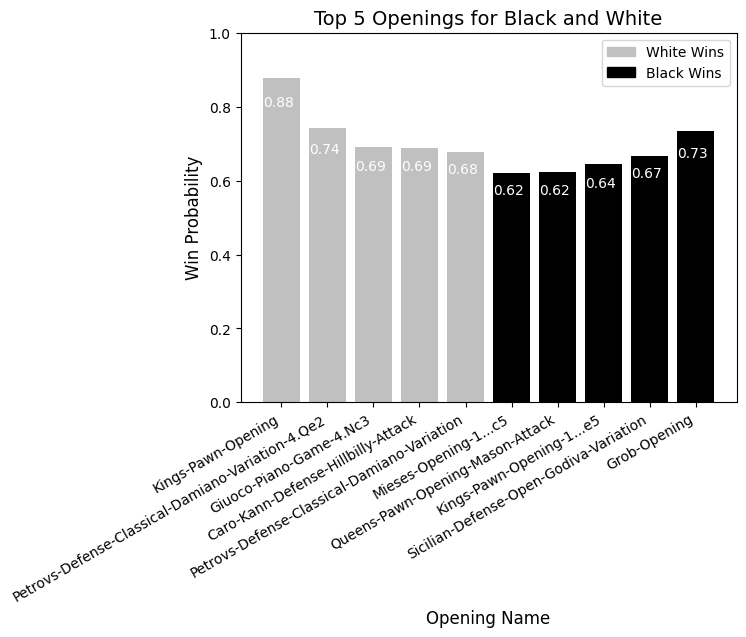

In [89]:
n = 5
os = list(wins.keys())
ps = list(wins.values())

for i in range(len(ps)):
    ps[i] = abs(ps[i])

whiteCol = "silver"
blackCol = "black"
    
colours = [whiteCol]*n + [blackCol]*n
fig, ax = plt.subplots()
bars = ax.bar((os[:n] + os[-6:-1]), (ps[:n] + ps[-6:-1]), color=colours)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x(), yval/1.1, yval, color = 'white')
plt.ylim(ymax = 1, ymin = 0)
plt.xticks(rotation = 30, ha = 'right')
plt.ylabel("Win Probability", fontsize=12)
plt.xlabel("Opening Name", fontsize=12)
plt.title("Top 5 Openings for Black and White", fontsize=14)
#ax.set_facecolor('slategrey')

white_patch = mpatches.Patch(color=whiteCol, label='White Wins')
black_patch = mpatches.Patch(color=blackCol, label='Black Wins')
plt.legend(handles=[white_patch, black_patch])

plt.show()

In [45]:
import requests
from bs4 import BeautifulSoup   
import chess
import re

In [58]:
white_most = white_rates.keys()[0]
black_most = black_rates.keys()[1]
most = total.keys()[0]

FEN for Bishops-Opening: rnbqkbnr/pppp1ppp/8/4p3/2B1P3/8/PPPP1PPP/RNBQK1NR b KQkq - 1 2



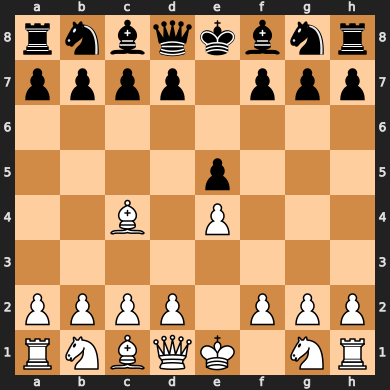

In [62]:
def get_chessBoard(opening):
    opening_url = f"https://www.chess.com/openings/{opening}"
    response = requests.get(opening_url)
    soup = BeautifulSoup(response.text, "html.parser")
    fen_script = soup.find_all("script")[-4].text
    f = re.search('"fen":"(.+?)"', fen_script)
    if f:
        fen = f.group(1)
    print("FEN for " + opening + ": " + fen + "\n")
    return(chess.Board(fen))
    
get_chessBoard(most)

FEN for Kings-Pawn-Opening: rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1



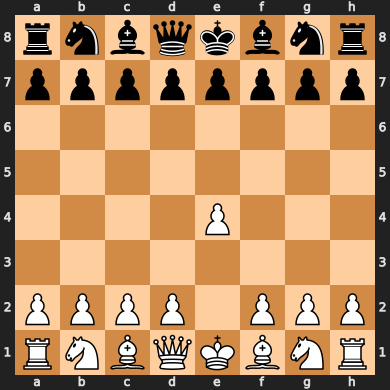

In [63]:
get_chessBoard(white_most)

FEN for Ruy-Lopez-Opening-Birds-Defense-4.Nxd4-exd4-5.d3: r1bqkbnr/pppp1ppp/8/1B6/3pP3/3P4/PPP2PPP/RNBQK2R b KQkq - 0 5



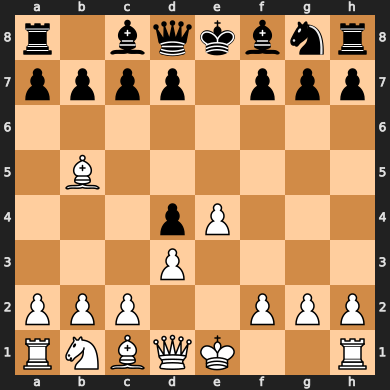

In [64]:
get_chessBoard(black_most)

In [90]:
mean

21.34663262049154